In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
import datetime

In [2]:
#Helper function to set the summary data for a city type row
def create_summary_row(total_rides,total_fares,drivers_count):    
    #Calculate average fare and average fare for driver
    avg_fare = total_fares / total_rides
    avg_fare_driver = total_fares / drivers_count
    return (total_rides,drivers_count,total_fares,avg_fare,avg_fare_driver)

In [3]:
# Files to load
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(city_data_df,ride_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [5]:
#Calculate the driver count from the original city data for each city type
driver_count_df = city_data_df.groupby(['type'])['driver_count'].sum()
d_count_u = driver_count_df["Urban"]
d_count_s = driver_count_df["Suburban"]
d_count_r = driver_count_df["Rural"]

In [6]:
#Calculate the total ride count from the merged data for each city type
total_rides_df = pyber_data_df.groupby(['type'])['ride_id'].count()
total_rides_u = total_rides_df["Urban"]
total_rides_s = total_rides_df["Suburban"]
total_rides_r = total_rides_df["Rural"]

In [7]:
#Calculate the total fare sum from the merged data for each city type
total_fares_df = pyber_data_df.groupby(['type'])['fare'].sum()
total_fares_u = total_fares_df["Urban"]
total_fares_s = total_fares_df["Suburban"]
total_fares_r = total_fares_df["Rural"]

In [8]:
#Create the summary row for each city type
urban_row = create_summary_row(total_rides_u,total_fares_u,d_count_u)
suburban_row = create_summary_row(total_rides_s,total_fares_s,d_count_s)
rural_row = create_summary_row(total_rides_r,total_fares_r,d_count_r)

In [9]:
#Add summary rows to an array to pass into creating a new DataFrame
rows = []
rows.append(rural_row)
rows.append(suburban_row)
rows.append(urban_row)

In [10]:
#Rename the columns and indices
summary_df = pd.DataFrame(rows, columns=['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver'], index=['Rural','Suburban','Urban'])
#Reset index
summary_df.index.name = None

In [11]:
#Set proper Output Style for Part I of Challenge
summary_df.style.format({'Total Rides': "{:,}",'Total Fares': "${:,.2f}",'Total Drivers': '{:,}', 'Average Fare per Ride': '${:.2f}', 'Average Fare per Driver': '${:.2f}'})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [12]:
pyber_data_df=pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df.set_index(pyber_data_df['Date'], inplace=True)

In [13]:
#Make a copy from the merged dataset on four columns
fares_df = pyber_data_df[["Date","City","City Type","Fare"]].copy()
fares_df.head()

,Date,City,City Type,Fare
Date,,,,
2019-02-24 08:40:38,2019-02-24 08:40:38,Richardfort,Urban,13.93
2019-02-13 12:46:07,2019-02-13 12:46:07,Richardfort,Urban,14.00
2019-02-16 13:52:19,2019-02-16 13:52:19,Richardfort,Urban,17.92
2019-02-01 20:18:28,2019-02-01 20:18:28,Richardfort,Urban,10.26
2019-04-17 02:26:37,2019-04-17 02:26:37,Richardfort,Urban,23.00


In [14]:
#Create a new column as a DateTime object from the Date provided
fares_df["DateTime"] = pd.to_datetime(fares_df["Date"])
#Drop the Date Columns
fares_df.drop(["Date"],axis=1,inplace=True)
#Set the index to DateTime
fares_df.set_index('DateTime',inplace=True)

In [15]:
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-02-24 08:40:38 to 2019-04-12 18:11:50
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       2375 non-null   object 
 1   City Type  2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [16]:
#Group the Fare and DateTime data by City Type
city_date_df = fares_df.groupby(["City Type", "DateTime"]).sum()
#Reset the Index
city_date_df.index.name = None
city_date_df.head()

Fare
City Type DateTime                  
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33

In [36]:
city_date_df.groupby("City Type").describe()

Fare                                                         
            count       mean        std    min    25%    50%    75%    max
City Type                                                                 
Rural       125.0  34.623440  14.558046  10.11  19.90  37.05  47.07  58.55
Suburban    625.0  30.970128  10.677508  12.05  21.97  30.75  39.83  49.96
Urban      1625.0  24.525772  11.738649   4.05  14.55  24.64  34.58  44.97

In [17]:
#Create a Pivot Table on City Type for the column, indexed on DateTime and looking at Fare
city_pivot_df = city_date_df.pivot_table(index="DateTime", columns="City Type")["Fare"]
city_pivot_df.describe()

City Type,Rural,Suburban,Urban
count,125.000000,625.000000,1625.000000
mean,34.623440,30.970128,24.525772
std,14.558046,10.677508,11.738649
min,10.110000,12.050000,4.050000
25%,19.900000,21.970000,14.550000
50%,37.050000,30.750000,24.640000
75%,47.070000,39.830000,34.580000
max,58.550000,49.960000,44.970000


In [18]:
#From the pivot table, filter 2019 Jan-April dates.
city_pivot_dates_df=city_pivot_df.loc['2019-01-01':'2019-04-28']
#Resample to get the sums of the Fares per week
city_pivot_dates_resample_df=city_pivot_dates_df.resample('7D').sum()
city_pivot_dates_resample_df.head()

City Type,Rural,Suburban,Urban
DateTime,,,
2019-01-01,187.92,876.61,1879.70
2019-01-08,139.80,1080.40,2193.36
2019-01-15,233.85,1163.93,2105.90
2019-01-22,210.94,1285.13,1846.98
2019-01-29,361.50,1079.58,2085.77


In [20]:
city_pivot_dates_resample_df["Urban"].describe()

count      17.000000
mean     2180.340000
std       238.693092
min      1846.980000
25%      1971.720000
50%      2156.880000
75%      2329.980000
max      2619.820000
Name: Urban, dtype: float64

In [21]:
city_pivot_dates_resample_df["Suburban"].describe()

count      17.000000
mean     1051.961176
std       162.008166
min       821.520000
25%       879.920000
50%      1067.990000
75%      1144.270000
max      1394.860000
Name: Suburban, dtype: float64

In [22]:
city_pivot_dates_resample_df["Rural"].describe()

count     17.000000
mean     230.217059
std      117.727561
min       75.650000
25%      139.800000
50%      210.940000
75%      292.060000
max      453.420000
Name: Rural, dtype: float64

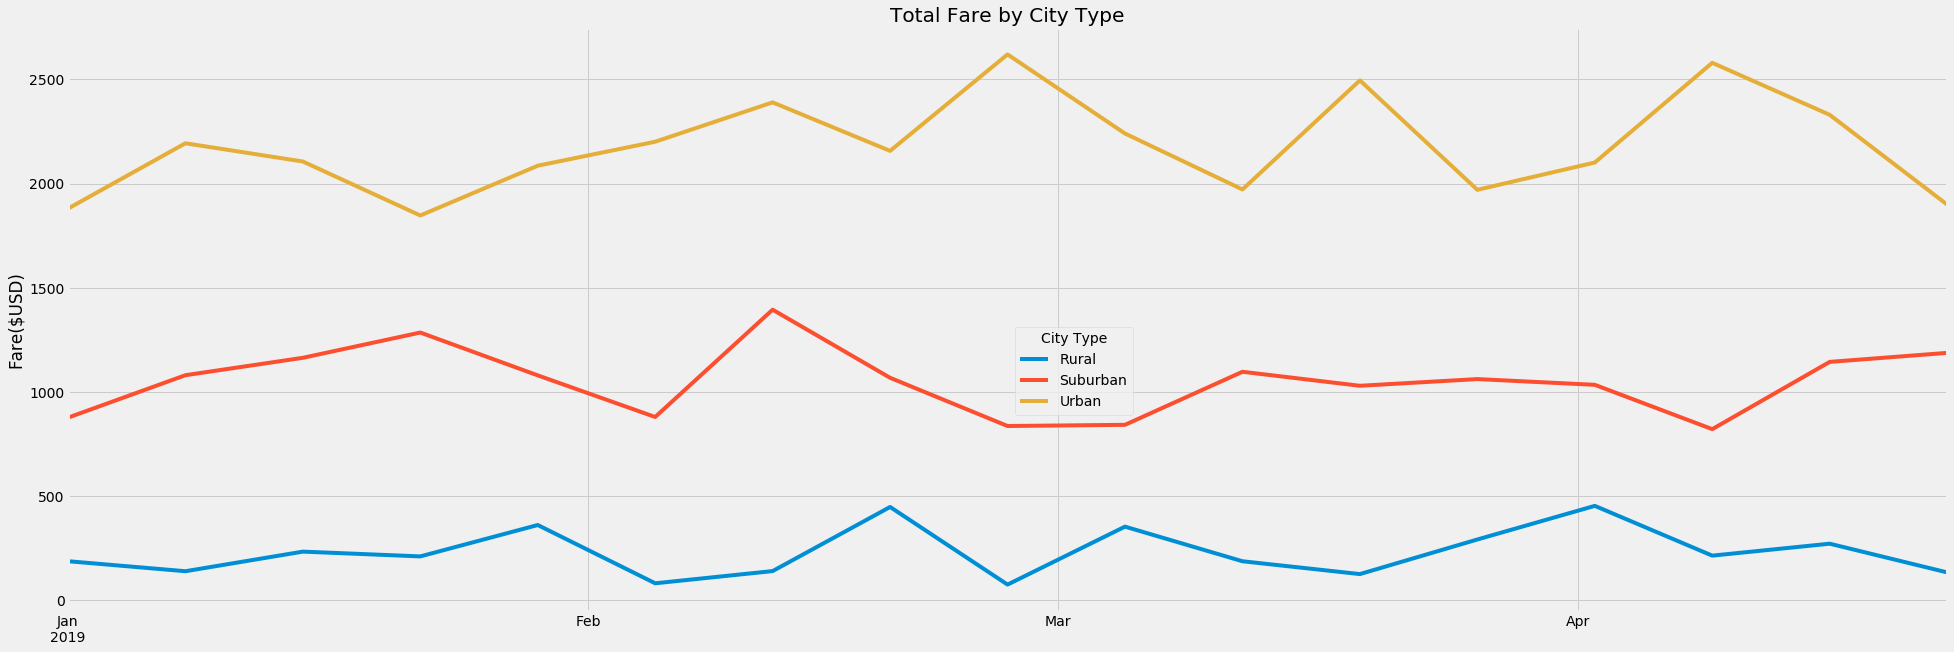

In [19]:
#Plot the Chart
style.use('fivethirtyeight')
#Plot data and increase figure size
ax = city_pivot_dates_resample_df.plot(figsize=(30,10))
#Set title and x,y labels
ax.set_title('Total Fare by City Type')
ax.set_xlabel('')
ax.set_ylabel('Fare($USD)')
#Center the legend as per the example shown
ax.get_legend().set_bbox_to_anchor((0.5, 0.5))
#Save plot to file
plt.savefig('./analysis/fare_sum_city_type.png')